# <b>Assignment : DT</b>

<font color='red'><b> Please check below video before attempting this assignment</b></font>

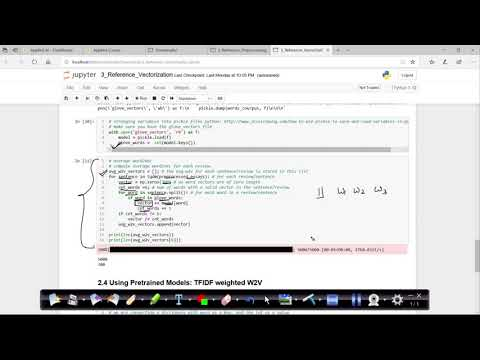

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('ZhLXULFjIjQ', width="1000",height="500")

<font color='red'><b> TF-IDFW2V</b></font>

<b>Tfidf w2v (w1,w2..) = (tfidf(w1) * w2v(w1) + tfidf(w2) * w2v(w2) + …)  /    (tfidf(w1) + tfidf(w2) + …)</b>

<b>(Optional) Please check course video on [AVgw2V and TF-IDFW2V ](https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/2916/avg-word2vec-tf-idf-weighted-word2vec/3/module-3-foundations-of-natural-language-processing-and-machine-learning)for more details.

<font color='blue'><b>Glove vectors </b></font>

<b>In this assignment you will be working with glove vectors , please check  [this](https://en.wikipedia.org/wiki/GloVe_(machine_learning)) and [this](https://en.wikipedia.org/wiki/GloVe_(machine_learning)) for more details.</b><br>

Download glove vectors from this [link ](https://drive.google.com/file/d/1lDca_ge-GYO0iQ6_XDLWePQFMdAA2b8f/view?usp=sharing)

In [3]:
!pip install pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [151]:
#please use below code to load glove vectors 
import pickle
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

or else , you can use below code

In [7]:
''''''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

IndexError: list index out of range

# <font color='red'> <b>Task - 1</b></font>

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features +  preprocessed_essay (TFIDF) + Sentiment scores(preprocessed_essay)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features +  preprocessed_essay (TFIDF W2V) + Sentiment scores(preprocessed_essay)</li>        </ul>
    </li>
    <li><strong>The hyper paramter tuning (best `depth` in range [1, 5, 10, 50], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use gridsearch cv or randomsearch cv)/simple cross validation data(you can write your own for loops refer sample solution)</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>min_sample_split</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>min_sample_split</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud(https://www.geeksforgeeks.org/generating-word-cloud-python/) with the words of essay text of these `false positive data points`</li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
   

# <font color='red'><b> Task - 2 </b></font>

For this task consider **set-1** features.

*  Select all the features which are having non-zero feature importance.You can get the feature importance using  'feature_importances_` 
   (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), discard the all other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM).
*  You need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3<br>
  **Note**: when you want to find the feature importance make sure you don't use max_depth parameter keep it None.
  </li>
    <br>
You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

<font color='blue'><b>Hint for calculating Sentiment scores</b></font>

In [2]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

In [18]:
X.head(1)
from tqdm import tqdm
essays=X['essay'].values
scores=[]
for essay in tqdm(essays):
    scores.append(sid.polarity_scores(essay))


100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [08:34<00:00, 212.44it/s]


[{'neg': 0.013, 'neu': 0.783, 'pos': 0.205, 'compound': 0.9867},
 {'neg': 0.072, 'neu': 0.68, 'pos': 0.248, 'compound': 0.9897}]

<h1>1. Decision Tree </h1>

## 1.1 Loading Data

In [4]:
import pandas
data = pandas.read_csv('preprocessed_data.csv')

In [5]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'],axis=1)
X.head(1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
len(X_train)

73196

# Sentiment Scores for essay

In [6]:
from tqdm import tqdm
essays_train=X_train['essay'].values
essays_test=X_test['essay'].values
scores_train=[]
scores_test=[]
for essay in tqdm(essays_train):
    scores_train.append(sid.polarity_scores(essay))
for essay in tqdm(essays_test):
    scores_test.append(sid.polarity_scores(essay))

100%|███████████████████████████████████████████████████████████████████████████| 36052/36052 [01:15<00:00, 477.25it/s]


In [7]:
scores_train[0:2]
import numpy as np
neg_train=[]
neu_train=[]
pos_train=[]
comp_train=[]
neg_test=[]
neu_test=[]
pos_test=[]
comp_test=[]
scores_train[0:2]

[{'neg': 0.054, 'neu': 0.879, 'pos': 0.067, 'compound': 0.3818},
 {'neg': 0.07, 'neu': 0.612, 'pos': 0.318, 'compound': 0.9882}]

In [8]:
for i in tqdm(range(len(scores_train))):
    neg_train.append(scores_train[i]['neg'])
    neu_train.append(scores_train[i]['neu'])
    pos_train.append(scores_train[i]['pos'])
    comp_train.append(scores_train[i]['compound'])
for i in tqdm(range(len(scores_test))):
    neg_test.append(scores_test[i]['neg'])
    neu_test.append(scores_test[i]['neu'])
    pos_test.append(scores_test[i]['pos'])
    comp_test.append(scores_test[i]['compound'])

100%|████████████████████████████████████████████████████████████████████████| 36052/36052 [00:00<00:00, 926896.99it/s]


In [9]:
import pandas as pd
neg_train=np.array(neg_train)
neu_train=np.array(neu_train)
pos_train=np.array(pos_train)
comp_train=np.array(comp_train)
neg_test=np.array(neg_test)
neu_test=np.array(neu_test)
pos_test=np.array(pos_test)
comp_test=np.array(comp_test)

In [10]:
ss_train=pd.DataFrame({'neg':neg_train,'neu':neu_train,'pos':pos_train,'compound':comp_train},columns=['neg','neu','pos','compound'])

In [11]:
ss_test=pd.DataFrame({'neg':neg_test,'neu':neu_test,'pos':pos_test,'compound':comp_test},columns=['neg','neu','pos','compound'])

In [12]:
ss_test.head()

,neg,neu,pos,compound
0,0.078,0.742,0.180,0.9415
1,0.069,0.654,0.276,0.9882
2,0.014,0.724,0.262,0.9941
3,0.060,0.743,0.197,0.9756
4,0.068,0.620,0.311,0.9970


# Encoding essay using TFIDF Vectorizer

In [148]:
from sklearn.feature_extraction.text import TfidfVectorizer
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print("="*100)


vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=10000)
tqdm(vectorizer.fit(X_train['essay'].values))
train_tfidf_essay = vectorizer.transform(X_train['essay'].values)
test_tfidf_essay = vectorizer.transform(X_test['essay'].values)

print("After vectorization")
print(train_tfidf_essay.shape, y_train.shape)
print(test_tfidf_essay.shape,y_test.shape)

(73196, 8) (73196,)
(36052, 8) (36052,)


0it [00:00, ?it/s]


After vectorization
(73196, 10000) (73196,)
(36052, 10000) (36052,)


# Encoding essay using TFIDF W2V Vectorizer

In [149]:
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(vectorizer.get_feature_names(), list(vectorizer.idf_)))
tfidf_words = set(vectorizer.get_feature_names())

In [157]:
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

100%|███████████████████████████████████████████████████████████████████████████| 73196/73196 [03:35<00:00, 339.00it/s]


In [162]:
len(tfidf_w2v_vectors)

73196

In [160]:
tfidf_test_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_test_w2v_vectors.append(vector)

100%|███████████████████████████████████████████████████████████████████████████| 36052/36052 [01:24<00:00, 427.26it/s]


In [198]:
len(tfidf_test_w2v_vectors[0])

300

<h2> Make Data Model Ready: encoding numerical, categorical features</h2>

In [163]:
#Encoding school state
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer.transform(X_train['school_state'].values)
X_test_state_ohe = vectorizer.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_test_state_ohe.shape, y_test.shape)

print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(73196, 51) (73196,)
(36052, 51) (36052,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


In [164]:
#Encoding teacher_prefix
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer.transform(X_train['teacher_prefix'].values)
X_test_teacher_ohe = vectorizer.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
#feature_list.extend(vectorizer.get_feature_names())
#feature_list2.extend(vectorizer.get_feature_names())
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(73196, 5) (73196,)
(36052, 5) (36052,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


In [165]:
#Encoding project_grade_category
vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectorizer.transform(X_train['project_grade_category'].values)
X_test_grade_ohe = vectorizer.transform(X_test['project_grade_category'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_test_grade_ohe.shape, y_test.shape)
#feature_list.extend(vectorizer.get_feature_names())
#feature_list2.extend(vectorizer.get_feature_names())
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(73196, 4) (73196,)
(36052, 4) (36052,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


In [166]:
#Encoding categories
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_cat_ohe = vectorizer.transform(X_train['clean_categories'].values)

X_test_cat_ohe = vectorizer.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_cat_ohe.shape, y_train.shape)
print(X_test_cat_ohe.shape, y_test.shape)
#feature_list.extend(vectorizer.get_feature_names())
#feature_list2.extend(vectorizer.get_feature_names())
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(73196, 9) (73196,)
(36052, 9) (36052,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


In [167]:
#Encoding cleam sub_categories
#Encoding categories
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_sub_ohe = vectorizer.transform(X_train['clean_categories'].values)

X_test_sub_ohe = vectorizer.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_sub_ohe.shape, y_train.shape)
print(X_test_sub_ohe.shape, y_test.shape)
#feature_list.extend(vectorizer.get_feature_names())
#feature_list2.extend(vectorizer.get_feature_names())
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(73196, 30) (73196,)
(36052, 30) (36052,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


In [168]:
#Encoding numercial features- price
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['price'].values.reshape(1,-1))

x_train_price_std = normalizer.transform(X_train['price'].values.reshape(1,-1))
x_test_price_std = normalizer.transform(X_test['price'].values.reshape(1,-1))

x_train_price_std = x_train_price_std.reshape(-1,1)
x_test_price_std = x_test_price_std.reshape(-1,1)

print('After vectorization:...')
print(x_train_price_std.shape,y_train.shape)
print(x_test_price_std.shape,y_test.shape)
#feature_list.append('price')
#feature_list2.append('price')
print("="*100)
print(x_train_price_std)

After vectorization:...
(73196, 1) (73196,)
(36052, 1) (36052,)
[[1.87780084e-03]
 [2.78852825e-04]
 [6.78549867e-05]
 ...
 [1.11812870e-02]
 [4.75464448e-04]
 [1.79891642e-03]]


In [170]:
#Encoding  teacher_number_of_previously_posted_projects
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

x_train_nppp_std = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
x_test_nppp_std = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

x_train_nppp_std = x_train_nppp_std.reshape(-1,1)
x_test_nppp_std = x_test_nppp_std.reshape(-1,1)

print('After vectorization:...')
print(x_test_nppp_std.shape,y_train.shape)
print(x_test_nppp_std.shape,y_test.shape)
#feature_list.append('teacher_number_of_previously_posted_projects')
#feature_list2.append('teacher_number_of_previously_posted_projects')
print("="*100)

After vectorization:...
(36052, 1) (73196,)
(36052, 1) (36052,)


In [171]:
#Encoding  sentiment scores ['neg']
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(ss_train['neg'].values.reshape(1,-1))

x_train_neg_std = normalizer.transform(ss_train['neg'].values.reshape(1,-1))
x_test_neg_std = normalizer.transform(ss_test['neg'].values.reshape(1,-1))

x_train_neg_std = x_train_neg_std.reshape(-1,1)
x_test_neg_std = x_test_neg_std.reshape(-1,1)

print('After vectorization:...')
print(x_train_neg_std.shape,y_train.shape)
print(x_test_neg_std.shape,y_test.shape)
#feature_list.append('teacher_number_of_previously_posted_projects')
#feature_list2.append('teacher_number_of_previously_posted_projects')
print("="*100)

After vectorization:...
(73196, 1) (73196,)
(36052, 1) (36052,)


In [173]:
#Encoding  sentiment scores ['neg']
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(ss_train['neg'].values.reshape(1,-1))

x_train_neg_std = normalizer.transform(ss_train['neg'].values.reshape(1,-1))
x_test_neg_std = normalizer.transform(ss_test['neg'].values.reshape(1,-1))

x_train_neg_std = x_train_neg_std.reshape(-1,1)
x_test_neg_std = x_test_neg_std.reshape(-1,1)

print('After vectorization:...')
print(x_train_neg_std.shape,y_train.shape)
print(x_test_neg_std.shape,y_test.shape)
#feature_list.append('teacher_number_of_previously_posted_projects')
#feature_list2.append('teacher_number_of_previously_posted_projects')
print("="*100)

After vectorization:...
(73196, 1) (73196,)
(36052, 1) (36052,)


In [174]:
#Encoding  sentiment scores ['neu']
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(ss_train['neu'].values.reshape(1,-1))

x_train_neu_std = normalizer.transform(ss_train['neu'].values.reshape(1,-1))
x_test_neu_std = normalizer.transform(ss_test['neu'].values.reshape(1,-1))

x_train_neu_std = x_train_neu_std.reshape(-1,1)
x_test_neu_std = x_test_neu_std.reshape(-1,1)

print('After vectorization:...')
print(x_train_neu_std.shape,y_train.shape)
print(x_test_neu_std.shape,y_test.shape)
#feature_list.append('teacher_number_of_previously_posted_projects')
#feature_list2.append('teacher_number_of_previously_posted_projects')
print("="*100)

After vectorization:...
(73196, 1) (73196,)
(36052, 1) (36052,)


In [175]:
#Encoding  sentiment scores ['pos']
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(ss_train['pos'].values.reshape(1,-1))

x_train_pos_std = normalizer.transform(ss_train['pos'].values.reshape(1,-1))
x_test_pos_std = normalizer.transform(ss_test['pos'].values.reshape(1,-1))

x_train_pos_std = x_train_pos_std.reshape(-1,1)
x_test_pos_std = x_test_pos_std.reshape(-1,1)

print('After vectorization:...')
print(x_train_pos_std.shape,y_train.shape)
print(x_test_pos_std.shape,y_test.shape)
#feature_list.append('teacher_number_of_previously_posted_projects')
#feature_list2.append('teacher_number_of_previously_posted_projects')
print("="*100)

After vectorization:...
(73196, 1) (73196,)
(36052, 1) (36052,)


In [176]:
#Encoding  sentiment scores ['compound']

from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(ss_train['compound'].values.reshape(1,-1))

x_train_comp_std = normalizer.transform(ss_train['compound'].values.reshape(1,-1))
x_test_comp_std = normalizer.transform(ss_test['compound'].values.reshape(1,-1))

x_train_comp_std = x_train_comp_std.reshape(-1,1)
x_test_comp_std = x_test_comp_std.reshape(-1,1)

print('After vectorization:...')
print(x_train_comp_std.shape,y_train.shape)
print(x_test_comp_std.shape,y_test.shape)
#feature_list.append('teacher_number_of_previously_posted_projects')
#feature_list2.append('teacher_number_of_previously_posted_projects')
print("="*100)

After vectorization:...
(73196, 1) (73196,)
(36052, 1) (36052,)


In [178]:
#Concatenating all features
from scipy.sparse import hstack

#Set 1: categorical, numerical features + preprocessed_eassay (BOW)
X_tr1 = hstack((train_tfidf_essay,X_train_state_ohe,X_train_teacher_ohe,X_train_grade_ohe,X_train_cat_ohe,X_train_sub_ohe,x_train_price_std,x_train_nppp_std,x_train_neg_std,x_train_neu_std,x_train_pos_std,x_train_comp_std)).tocsr()
X_te1 = hstack((test_tfidf_essay,X_test_state_ohe,X_test_teacher_ohe,X_test_grade_ohe,X_test_cat_ohe,X_test_sub_ohe,x_test_price_std,x_test_nppp_std,x_test_neg_std,x_test_neu_std,x_test_pos_std,x_test_comp_std)).tocsr()

#Set 2: categorical, numerical features + preprocessed_eassay (TFIDF)
X_tr2 = hstack((tfidf_w2v_vectors,X_train_state_ohe,X_train_teacher_ohe,X_train_grade_ohe,X_train_cat_ohe,X_train_sub_ohe,x_train_price_std,x_train_nppp_std)).tocsr()
X_te2 = hstack((tfidf_test_w2v_vectors,X_test_state_ohe,X_test_teacher_ohe,X_test_grade_ohe,X_test_cat_ohe,X_test_sub_ohe,x_test_price_std,x_test_nppp_std)).tocsr()


print("Set 1:")
print(X_tr1.shape, y_train.shape)
print(X_te1.shape, y_test.shape)
print('Set 2 ')
print(X_tr2.shape, y_train.shape)
print(X_te2.shape, y_test.shape)
print("="*100)

Set 1:
(73196, 10105) (73196,)
(36052, 10105) (36052,)
Set 2 
(73196, 401) (73196,)
(36052, 401) (36052,)


# Hyperparameter Tuning (depth & min_samples_split)

In [27]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
#Hyperparameter tuning for feature set1
params ={'max_depth':[1, 5, 10, 50],'min_samples_split':[5, 10, 100, 500]}
model = DecisionTreeClassifier()
clf = RandomizedSearchCV(model,params,cv=5,scoring='roc_auc',return_train_score=True)
result=clf.fit(X_tr1,y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)


In [179]:
#Hyperparameter tuning for feature set2

params ={'max_depth':[1, 5, 10, 50],'min_samples_split':[5, 10, 100, 500]}
model = DecisionTreeClassifier()
clf = RandomizedSearchCV(model,params,cv=5,scoring='roc_auc',return_train_score=True)
result3=clf.fit(X_tr2,y_train)

results3 = pd.DataFrame.from_dict(clf.cv_results_)

# Representation of Results: Feature Set 1

Text(0.5,1,'Corelation Heatmap of Train')

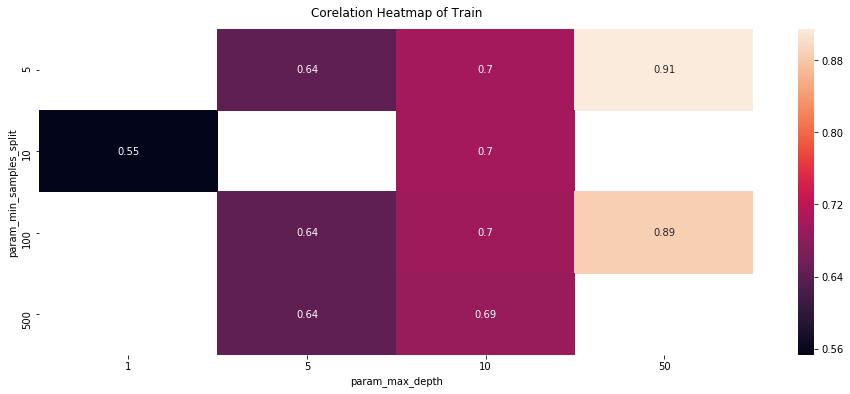

In [130]:
HeatTrain = results.copy()
HeatTrain = HeatTrain.pivot_table(index='param_min_samples_split',columns='param_max_depth',values='mean_train_score')
plt.figure(figsize=(16,6))
hmap = sns.heatmap(HeatTrain,annot=True)
hmap.set_title('Corelation Heatmap of Train', fontdict={'fontsize':12},pad=12)

Text(0.5,1,'Corelation Heatmap of Cross-Validation')

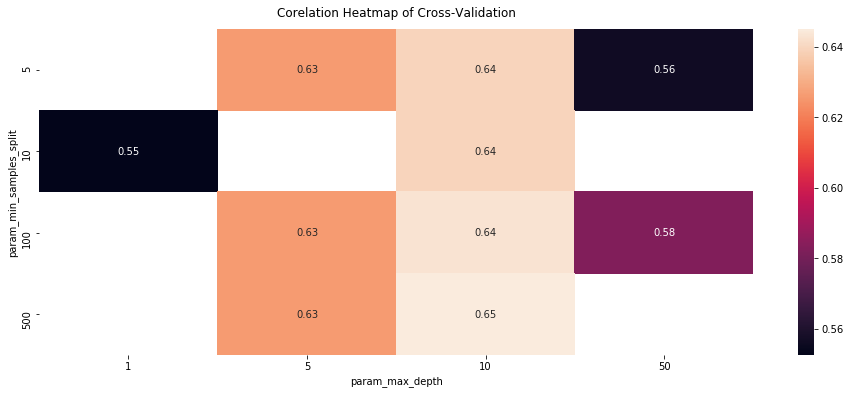

In [134]:
HeatTest = results.copy()
HeatTest = HeatTest.pivot_table(index='param_min_samples_split',columns='param_max_depth',values='mean_test_score')
plt.figure(figsize=(16,6))
hmap = sns.heatmap(HeatTest,annot=True)
hmap.set_title('Corelation Heatmap of Cross-Validation', fontdict={'fontsize':12},pad=12)

In [33]:

def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [34]:
result.best_params_

{'min_samples_split': 500, 'max_depth': 10}

In [35]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc


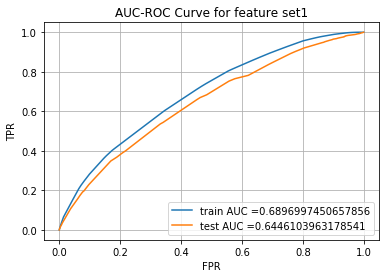

In [36]:
best_min_samples_split = 500
best_max_depth = 10
#After finding the best hyperparameter, we use that alpha to train the model and test its performacnce using test AUC score

from sklearn.metrics import roc_curve, auc
model = DecisionTreeClassifier(min_samples_split=best_min_samples_split,max_depth=best_max_depth)
model.fit(X_tr1,y_train)

y_train_pred = batch_predict(model,X_tr1)
y_test_pred = batch_predict(model,X_te1)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred) #roc_curve(true class labels,probs of class 1)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC-ROC Curve for feature set1")
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.3947942503798372 for threshold 0.865
Test confusion matrix


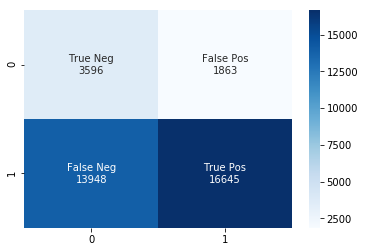

In [37]:
#Printing the confusion matrix with heatmap enabled -row = actual and column = predicted samples
# 0=negative and 1=positive
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Test confusion matrix")
cm = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))


import seaborn as sns
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]

group_names = ['True Neg','False Pos','False Neg','True Pos']
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels,fmt="",cmap='Blues');

# Representation of results: Feature Set 2

Text(0.5,1,'Corelation Heatmap of Train')

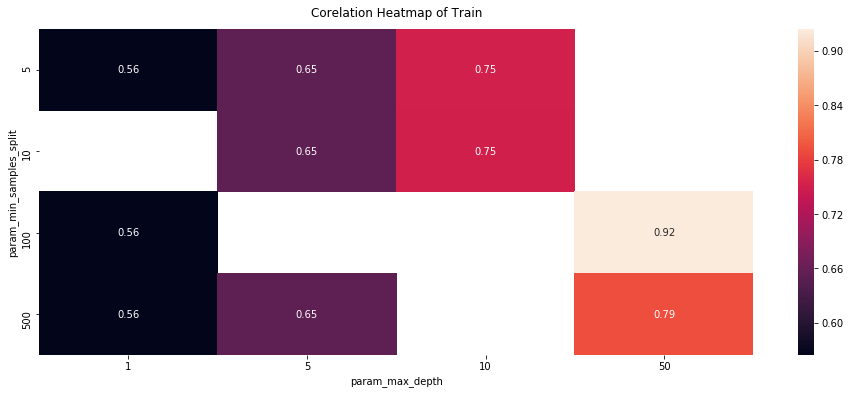

In [182]:
HeatTrain = results3.copy()
HeatTrain = HeatTrain.pivot_table(index='param_min_samples_split',columns='param_max_depth',values='mean_train_score')
plt.figure(figsize=(16,6))
hmap = sns.heatmap(HeatTrain,annot=True)
hmap.set_title('Corelation Heatmap of Train', fontdict={'fontsize':12},pad=12)

Text(0.5,1,'Corelation Heatmap of Cross-Validation')

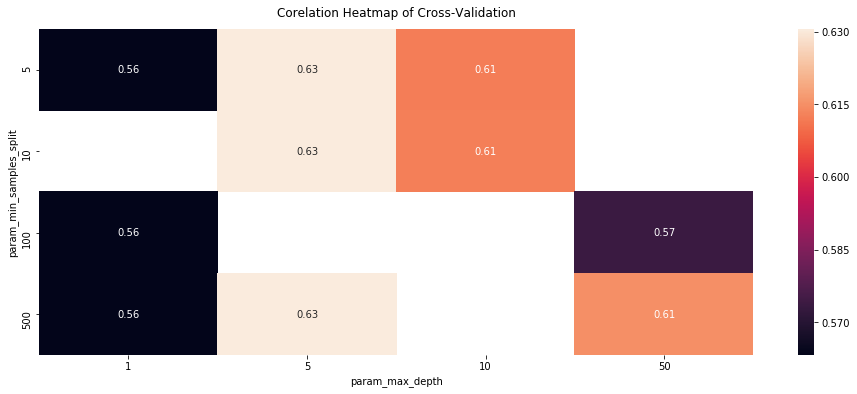

In [183]:
HeatTest = results3.copy()
HeatTest = HeatTest.pivot_table(index='param_min_samples_split',columns='param_max_depth',values='mean_test_score')
plt.figure(figsize=(16,6))
hmap = sns.heatmap(HeatTest,annot=True)
hmap.set_title('Corelation Heatmap of Cross-Validation', fontdict={'fontsize':12},pad=12)

In [181]:
result3.best_params_

{'min_samples_split': 500, 'max_depth': 5}

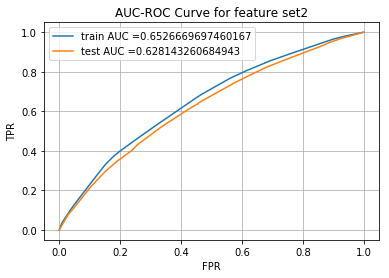

In [189]:
best_min_samples_split = 500
best_max_depth = 5
#After finding the best hyperparameter, we use that alpha to train the model and test its performacnce using test AUC score

from sklearn.metrics import roc_curve, auc
model = DecisionTreeClassifier(min_samples_split=best_min_samples_split,max_depth=best_max_depth)
model.fit(X_tr2,y_train)

y_train_pred = batch_predict(model,X_tr2)
y_test_pred = batch_predict(model,X_te2)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred) #roc_curve(true class labels,probs of class 1)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC-ROC Curve for feature set2")
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.36770021214707127 for threshold 0.855
Test confusion matrix


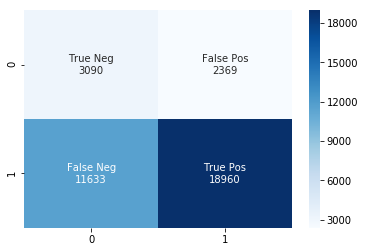

In [190]:
#Printing the confusion matrix with heatmap enabled -row = actual and column = predicted samples
# 0=negative and 1=positive
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Test confusion matrix")
cm = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))


import seaborn as sns
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]

group_names = ['True Neg','False Pos','False Neg','True Pos']
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels,fmt="",cmap='Blues');

# Feature Set1 :Word Cloud, Boxplot(Price) and PDF(previous projects)

In [42]:
test_pred=predict_with_best_t(y_test_pred, best_t)
len(y_test)
#len(test_pred)
indices = []
for i in range(len(y_test)):
    if test_pred[i]==1 and y_test[i]!=test_pred[i]:
        indices.append(i)


In [56]:
fps=X_test.iloc[indices]
fps_essay = fps['essay'].values

In [54]:
!pip install wordcloud


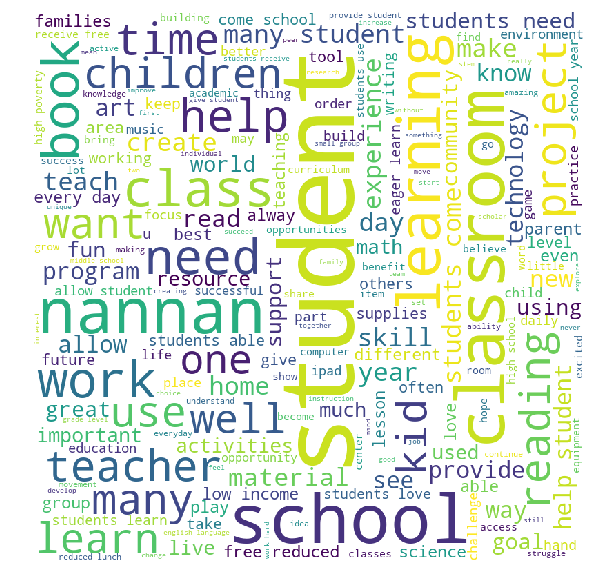

In [57]:
# Python program to generate WordCloud 
# Reference: https://www.geeksforgeeks.org/generating-word-cloud-python/
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

# Reads 'Youtube04-Eminem.csv' file 
#df = pd.read_csv(r"Youtube04-Eminem.csv", encoding ="latin-1") 

comment_words = '' 
stopwords = set(STOPWORDS) 

# iterate through the csv file 
for val in fps_essay: 
    
	# typecaste each val to string 
	val = str(val) 

	# split the value 
	tokens = val.split() 
	
	# Converts each token into lowercase 
	for i in range(len(tokens)): 
		tokens[i] = tokens[i].lower() 
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, 
				background_color ='white', 
				stopwords = stopwords, 
				min_font_size = 10).generate(comment_words) 

# plot the WordCloud image					 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 


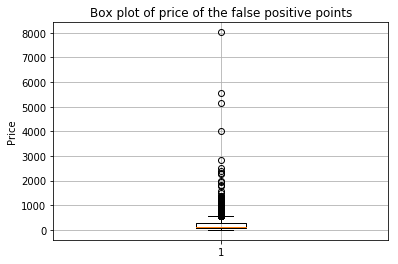

In [67]:
plt.boxplot(fps['price'].values)
plt.ylabel('Price')
plt.grid()
plt.title('Box plot of price of the false positive points')
plt.show()

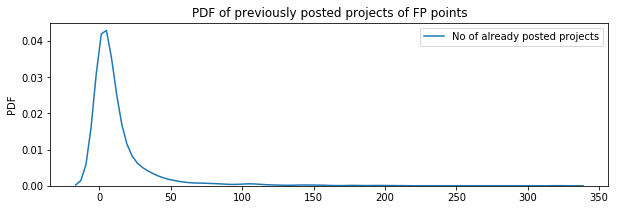

In [73]:
plt.figure(figsize=(10,3))
sns.distplot(fps['teacher_number_of_previously_posted_projects'].values, hist=False, label="No of already posted projects")
#sns.distplot(rejected_word_count, hist=False, label="Not Approved Projects")
plt.legend()
plt.ylabel('PDF')
plt.title('PDF of previously posted projects of FP points')
plt.show()

# Feature Set2 :Word Cloud, Boxplot(Price) and PDF(previous projects)

In [191]:
test_pred=predict_with_best_t(y_test_pred, best_t)
len(y_test)
#len(test_pred)
indices = []
for i in range(len(y_test)):
    if test_pred[i]==1 and y_test[i]!=test_pred[i]:
        indices.append(i)

In [192]:
fps2=X_test.iloc[indices]
fps2_essay = fps['essay'].values

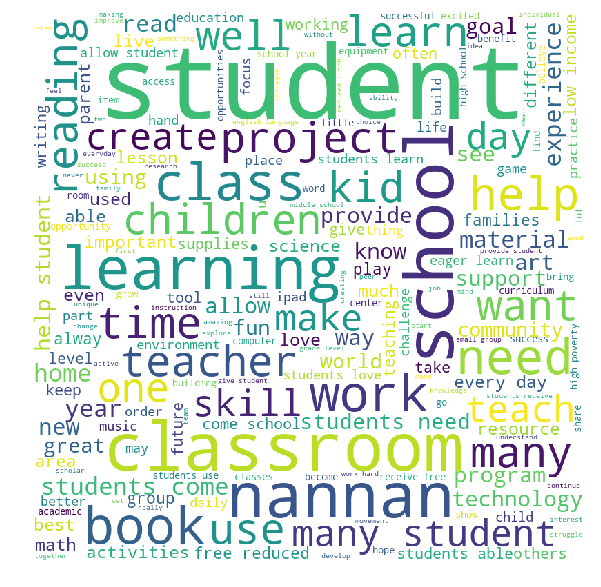

In [193]:
# Python program to generate WordCloud 
# Reference: https://www.geeksforgeeks.org/generating-word-cloud-python/
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

# Reads 'Youtube04-Eminem.csv' file 
#df = pd.read_csv(r"Youtube04-Eminem.csv", encoding ="latin-1") 

comment_words = '' 
stopwords = set(STOPWORDS) 

# iterate through the csv file 
for val in fps2_essay: 
    
	# typecaste each val to string 
	val = str(val) 

	# split the value 
	tokens = val.split() 
	
	# Converts each token into lowercase 
	for i in range(len(tokens)): 
		tokens[i] = tokens[i].lower() 
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, 
				background_color ='white', 
				stopwords = stopwords, 
				min_font_size = 10).generate(comment_words) 

# plot the WordCloud image					 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 


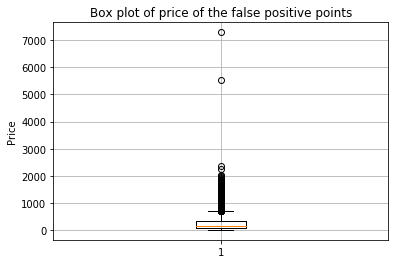

In [194]:
plt.boxplot(fps2['price'].values)
plt.ylabel('Price')
plt.grid()
plt.title('Box plot of price of the false positive points')
plt.show()

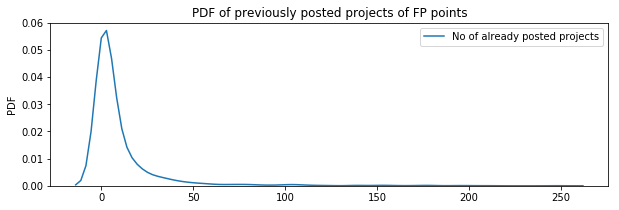

In [195]:
plt.figure(figsize=(10,3))
sns.distplot(fps2['teacher_number_of_previously_posted_projects'].values, hist=False, label="No of already posted projects")
#sns.distplot(rejected_word_count, hist=False, label="Not Approved Projects")
plt.legend()
plt.ylabel('PDF')
plt.title('PDF of previously posted projects of FP points')
plt.show()

# Task 2: Feature Set1

In [84]:
FI=model.feature_importances_
feature_indices=[i for i in range(len(FI)) if FI[i] !=0]

In [118]:
feature_indices
selected_X_tr1 = hstack((train_tfidf_essay,X_train_state_ohe,X_train_teacher_ohe,X_train_grade_ohe,X_train_cat_ohe,X_train_sub_ohe,x_train_price_std,x_train_nppp_std,x_train_neg_std,x_train_neu_std,x_train_pos_std,x_train_comp_std)).tocsr()
selected_X_te1 = hstack((test_tfidf_essay,X_test_state_ohe,X_test_teacher_ohe,X_test_grade_ohe,X_test_cat_ohe,X_test_sub_ohe,x_test_price_std,x_test_nppp_std,x_test_neg_std,x_test_neu_std,x_test_pos_std,x_test_comp_std)).tocsr()

In [119]:
selected_X_tr1=selected_X_tr1[:,feature_indices]

In [120]:
selected_X_te1=selected_X_te1[:,feature_indices]

In [137]:
model = DecisionTreeClassifier(max_features=len(feature_indices))
params ={'max_depth':[1, 5, 10, 50],'min_samples_split':[5, 10, 100, 500]}
clf = RandomizedSearchCV(model,params,cv=5,scoring='roc_auc',return_train_score=True)
result2=clf.fit(selected_X_tr1,y_train)

results2 = pd.DataFrame.from_dict(clf.cv_results_)

In [136]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [140]:
results2.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.944526,0.021201,0.013782,0.002043,100,5,"{'min_samples_split': 100, 'max_depth': 5}",0.634978,0.634134,0.616681,...,0.628115,0.007914,6,0.642001,0.642041,0.644131,0.645907,0.644386,0.643693,0.001494
1,2.455905,0.032073,0.035582,0.043656,100,10,"{'min_samples_split': 100, 'max_depth': 10}",0.661498,0.659356,0.647585,...,0.653651,0.006768,2,0.700159,0.695013,0.701345,0.707012,0.698270,0.700360,0.003955
2,2.187283,0.032090,0.014769,0.001300,500,10,"{'min_samples_split': 500, 'max_depth': 10}",0.664453,0.661018,0.652154,...,0.655922,0.007268,1,0.695819,0.691542,0.695806,0.695640,0.692992,0.694360,0.001770
3,2.534204,0.043103,0.014579,0.000472,10,10,"{'min_samples_split': 10, 'max_depth': 10}",0.660678,0.656758,0.642271,...,0.650060,0.008212,3,0.704007,0.700529,0.705517,0.712649,0.702250,0.704990,0.004179
4,2.564059,0.039087,0.014701,0.000976,5,10,"{'min_samples_split': 5, 'max_depth': 10}",0.659312,0.656860,0.641736,...,0.649815,0.007906,4,0.704699,0.701591,0.706572,0.714125,0.703391,0.706076,0.004342


Text(0.5,1,'Corelation Heatmap of Train')

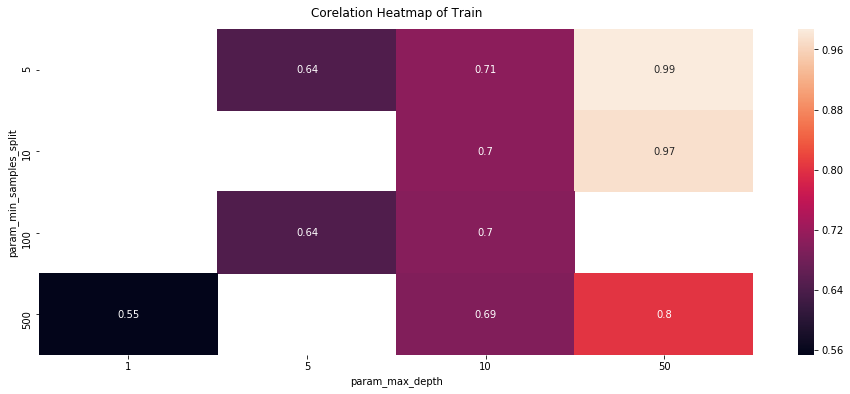

In [141]:
HeatTrain = results2.copy()
HeatTrain = HeatTrain.pivot_table(index='param_min_samples_split',columns='param_max_depth',values='mean_train_score')
plt.figure(figsize=(16,6))
hmap = sns.heatmap(HeatTrain,annot=True)
hmap.set_title('Corelation Heatmap of Train', fontdict={'fontsize':12},pad=12)

Text(0.5,1,'Corelation Heatmap of Cross-Validation')

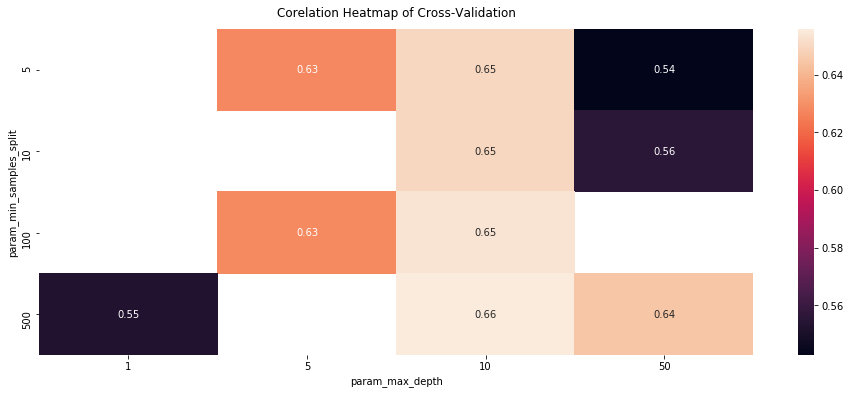

In [142]:
HeatTest = results2.copy()
HeatTest = HeatTest.pivot_table(index='param_min_samples_split',columns='param_max_depth',values='mean_test_score')
plt.figure(figsize=(16,6))
hmap = sns.heatmap(HeatTest,annot=True)
hmap.set_title('Corelation Heatmap of Cross-Validation', fontdict={'fontsize':12},pad=12)

In [143]:
result2.best_params_

{'min_samples_split': 500, 'max_depth': 10}

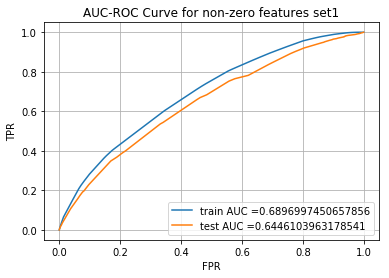

In [146]:
best_min_samples_split = 500
best_max_depth = 10
#After finding the best hyperparameter, we use that alpha to train the model and test its performacnce using test AUC score

from sklearn.metrics import roc_curve, auc
model = DecisionTreeClassifier(min_samples_split=best_min_samples_split,max_depth=best_max_depth,max_features=len(feature_indices))
model.fit(selected_X_tr1,y_train)

y_train_pred = batch_predict(model,selected_X_tr1)
y_test_pred = batch_predict(model,selected_X_te1)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred) #roc_curve(true class labels,probs of class 1)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC-ROC Curve for non-zero features set1")
plt.grid()
plt.show()

# Task2:Feature Set2

In [199]:
FI=model.feature_importances_
feature_indices=[i for i in range(len(FI)) if FI[i] !=0]
selected_X_tr2 = hstack((train_tfidf_essay,X_train_state_ohe,X_train_teacher_ohe,X_train_grade_ohe,X_train_cat_ohe,X_train_sub_ohe,x_train_price_std,x_train_nppp_std,x_train_neg_std,x_train_neu_std,x_train_pos_std,x_train_comp_std)).tocsr()
selected_X_te2 = hstack((test_tfidf_essay,X_test_state_ohe,X_test_teacher_ohe,X_test_grade_ohe,X_test_cat_ohe,X_test_sub_ohe,x_test_price_std,x_test_nppp_std,x_test_neg_std,x_test_neu_std,x_test_pos_std,x_test_comp_std)).tocsr()

In [200]:
selected_X_tr2=selected_X_tr2[:,feature_indices]

In [201]:
selected_X_te2=selected_X_te2[:,feature_indices]

In [203]:
model = DecisionTreeClassifier(max_features=len(feature_indices))
params ={'max_depth':[1, 5, 10, 50],'min_samples_split':[5, 10, 100, 500]}
clf = RandomizedSearchCV(model,params,cv=5,scoring='roc_auc',return_train_score=True)
result4=clf.fit(selected_X_tr2,y_train)

results4 = pd.DataFrame.from_dict(clf.cv_results_)

Text(0.5,1,'Corelation Heatmap of Train')

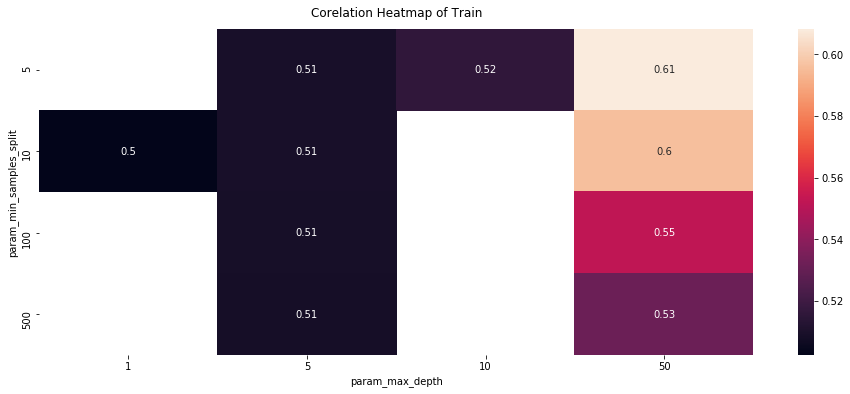

In [205]:
HeatTrain = results4.copy()
HeatTrain = HeatTrain.pivot_table(index='param_min_samples_split',columns='param_max_depth',values='mean_train_score')
plt.figure(figsize=(16,6))
hmap = sns.heatmap(HeatTrain,annot=True)
hmap.set_title('Corelation Heatmap of Train', fontdict={'fontsize':12},pad=12)

Text(0.5,1,'Corelation Heatmap of Cross-Validation')

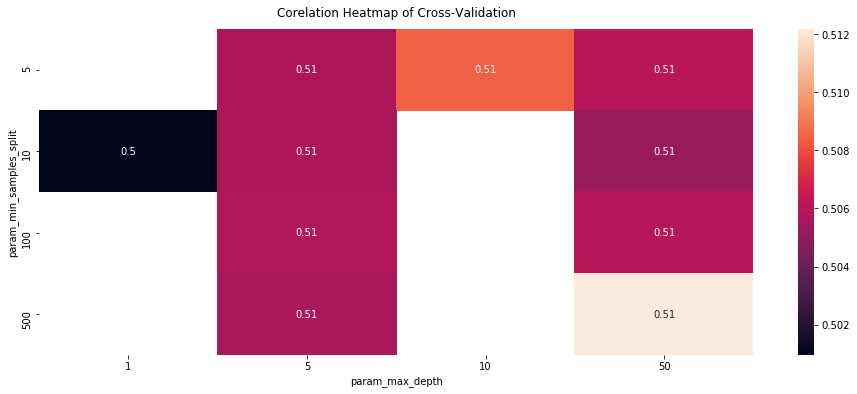

In [206]:
HeatTest = results4.copy()
HeatTest = HeatTest.pivot_table(index='param_min_samples_split',columns='param_max_depth',values='mean_test_score')
plt.figure(figsize=(16,6))
hmap = sns.heatmap(HeatTest,annot=True)
hmap.set_title('Corelation Heatmap of Cross-Validation', fontdict={'fontsize':12},pad=12)

In [204]:
result4.best_params_

{'min_samples_split': 500, 'max_depth': 50}

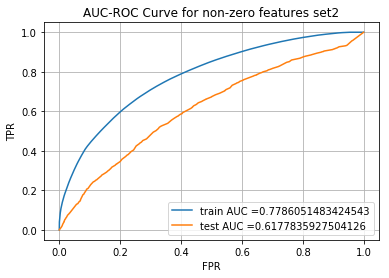

In [207]:
best_min_samples_split = 500
best_max_depth = 50
#After finding the best hyperparameter, we use them to train the model and test its performacnce using test AUC score

from sklearn.metrics import roc_curve, auc
model = DecisionTreeClassifier(min_samples_split=best_min_samples_split,max_depth=best_max_depth,max_features=len(feature_indices))
model.fit(selected_X_tr1,y_train)

y_train_pred = batch_predict(model,selected_X_tr1)
y_test_pred = batch_predict(model,selected_X_te1)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred) #roc_curve(true class labels,probs of class 1)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC-ROC Curve for non-zero features set2")
plt.grid()
plt.show()

# Summary:


In [208]:
from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Vectorizer", "Model", "Hyper parameter Max_Depth","Hyper parameter min_samples_split", "AUC"]
x.add_row(["TFIDF","Decision Tree Classifier","10",'500',"64.46"])
x.add_row(['TFIDF W2V','Decision Tree Classifier',"5","500","62.81"])
print('Summary of Task1:')
print(x)

Summary of Task1:
+------------+--------------------------+---------------------------+-----------------------------------+-------+
| Vectorizer |          Model           | Hyper parameter Max_Depth | Hyper parameter min_samples_split |  AUC  |
+------------+--------------------------+---------------------------+-----------------------------------+-------+
|   TFIDF    | Decision Tree Classifier |             10            |                500                | 64.46 |
| TFIDF W2V  | Decision Tree Classifier |             5             |                500                | 62.81 |
+------------+--------------------------+---------------------------+-----------------------------------+-------+


In [209]:
from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Vectorizer", "Model", "Hyper parameter Max_Depth","Hyper parameter min_samples_split", "AUC"]
x.add_row(["TFIDF","Decision Tree Classifier","10",'500',"64.46"])
x.add_row(['TFIDF W2V','Decision Tree Classifier',"50","500","61.77"])
print('Summary of Task 2:')
print(x)

Summary of Task 2:
+------------+--------------------------+---------------------------+-----------------------------------+-------+
| Vectorizer |          Model           | Hyper parameter Max_Depth | Hyper parameter min_samples_split |  AUC  |
+------------+--------------------------+---------------------------+-----------------------------------+-------+
|   TFIDF    | Decision Tree Classifier |             10            |                500                | 64.46 |
| TFIDF W2V  | Decision Tree Classifier |             50            |                500                | 61.77 |
+------------+--------------------------+---------------------------+-----------------------------------+-------+
